In [215]:
import pandas
import numpy as np
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances
emails = pandas.read_csv('/Users/Anton/Desktop/Учеба/Тексты/hw2/hillary-clinton-emails/Emails.csv')


In [151]:
emails.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

### Предобработка
##### 1) Удаляем все пустые ячейки
##### 2) Удаляем специальные слова, которые характеризуют заголовки письма
##### 3) Приводим слова к нижнему регистру для предотвращения дублирования
##### 4) Удаляем все специальные символы

In [152]:
text_mails =  data.ExtractedBodyText.dropna().values


In [153]:
words_for_delete = ['UNCLASSIFIED', 'SUBJECT', 'RELEASE',
                    'Doc', 'U.S. Department',  'Cc', 'Re', 'cc', 'Case', 'From', 'To', 
                    'Sent', 'Date', "fwd"]
def process(line):
    for w in words_for_delete:
        line =line.replace(w, '')
    return line.lower()

In [154]:
text_mails = list(map(preprocess, text_mails))

In [155]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]+')
text_mails = list(map(lambda x: ' '.join(tokenizer.tokenize(x)), text_mails))

In [156]:
text_mails[0:10]

['b thursday march pm h latest how syria is aiding qaddafi and more sid hrc memo syria aiding libya docx hrc memo syria aiding libya docx march for hillary',
 'thx',
 'h hrod clintonemail com friday march pm huma abedin fw h latest how syria is aiding qaddafi and more sid hrc memo syria aiding libya docx pis print',
 'pis print h hrod clintonernailcom wednesday september pm russorv state gov fw meet the right wing extremist behind anti fvluslim film that sparked deadly riots meat wednesday september pm subject meet the right wing extremist behind anti muslim film that sparked deadly riots htte maxbiumenthal com meet the right wing extremist behind anti musiim tihn that sparked deadly riots from my verizon wireless g lte droid of state no f no c state dept produced to house select benghazi comm to agreement on sensitive information redactions no foia waiver state cb',
 'h hrod clintonemail corn friday march pm huma abedin fw h latest how syria is aiding qaddafi and more sid hrc memo syr

### Поиск самых часто встречающихся биграмм

In [157]:
all_words = []
for line in text_mails:
    all_words += line.split(' ')
    
bigrams = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder.nbest(bigrams.pmi, 7)


[('aaaaaaaabhm', 'uucitwnkilm'),
 ('aafia', 'siddiqui'),
 ('aaron', 'schoch'),
 ('abba', 'eban'),
 ('acfe', 'asis'),
 ('achtnn', 'nepdc'),
 ('aciout', 'foreimi')]

In [158]:
sorted(finder.nbest(bigrams.raw_freq, 5))

[('and', 'the'), ('in', 'the'), ('of', 'the'), ('on', 'the'), ('to', 'the')]

### Выполнение кластеризации писем и ее визуализация

In [268]:
X = TfidfVectorizer(min_df=10, max_df=500).fit_transform(text_mails)
svd = TruncatedSVD().fit_transform(X)

In [269]:
n_cls = 5
kmeans = KMeans(n_clusters=n_cls)
kmean = kmeans.fit_predict(svd)

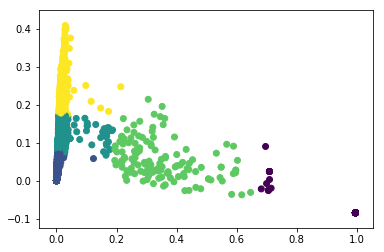

In [270]:
plt.scatter(svd[:, 0], svd[:, 1], c=kmean)
plt.show()

### Визуализация содержимого кластеров

Выведем по одному сэмплу из кластера, которые находятся ближе всего к центру кластера, а значит ярче всего характеризуют каждый кластер.

In [271]:
for cls, center in enumerate(kmeans.cluster_centers_):
    dists = euclidean_distances(svd, [center])
    minDist = np.argmin(dists)
    print ('Cluster ' + str(cls) + '\n' + text_mails[minDist] + '\n')

Cluster 0
ok

Cluster 1
i hope your travels are excellent we expect dayton to prevail in the recount looking forward to finalizing details and getting underway with you warm regards

Cluster 2
dca negotiations are still on for week after next aug as requested amb barco called to request that we slide right one day aug they requested this based on a visit of mexican president calderon who will visit bogota aug the dep fm and some mindef officials want to be in bogota for calderon s visit let me know if you have any other questions

Cluster 3
hrc we are going to extend invites tomorrow morning if ok with you

Cluster 4
sbwhoeop monday february pm h just fyi what s going around les gelb sid ambling over rahm by leslie h gelb february i pm l alex brandon ap photo leslie h gelb s call for white house chief of staff rahm emanuel to be reassigned spurred a circle the wagons reaction from pro or perhaps even anti rahm forces gelb sifts the fallout for clues when you write that the president of

### Оценка кластеров с помощью асессоров

###### Для оценки интерпретируемости кластеров при помощи асессоров будем использовать следующий подход. Возьмем n писем из одного кластера, полученного алгоритмом. Предложим асессору определить, сложил бы он эти письма в один кластер или нет. Находим кластер с максимальным размером, который определил асессор, данное число будет баллом для данного кластера. Совершаем данную процедуру для всех 5 кластеров, затем складываем баллы по всем кластерам и делим на 5*n;

Эксперимент:
Было взято 5 писем из каждого кластера. Асессор разделил письма следующим образом:

письма из 1 кластера) 3 письма, 2 письма (максимальный размер кластера ассесора = 3; 3 балла)

письма из 2 кластера) 1 письмо,  1 письмо,  1 письмо,  1 письмо,  1 письмо (1 балл)

письма из 3 кластера) 4 письма,  1 письмо (4 балла)

письма из 4 кластера) 2 письма, 2 письма,  1 письмо (2 балла)

письма из 5 кластера) 5 писем (5 баллов)

Оценка качества: (3 + 1 + 4 + 2 + 5) / (5 * 5) = 0.6

In [275]:
(3 + 1 + 4 + 2 + 5) / (5 * 5)

0.6